# Data Visualization & Analysis

## Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap # install "umap-learn" instead of "umap"
from IPython.display import display

In [2]:
# Read trainning set of data
train = pd.read_csv('~/D2K_BCM_DATASET/train_genelevel_90%.tsv', sep = '\t', index_col = [0])
train = train.transpose()
train.index.name = 'r_id'
train.reset_index(inplace = True)

display(train.head())
display(train.shape)

,r_id,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
0,205_2,202.0,261.0,194.0,25.0,428.00,169.0,709.0,557.0,354.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1,251_1,243.0,369.0,188.0,15.0,91.06,118.0,396.0,484.0,533.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,474_3,230.0,355.0,234.0,14.0,83.00,92.0,424.0,502.0,470.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,178_4,270.0,375.0,236.0,14.0,184.00,87.0,442.0,1020.0,612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,313_1,232.0,317.0,385.0,14.0,167.78,94.0,403.0,747.0,305.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(407, 55170)

In [3]:
# Merge gene data in training set with batches factors that we want to take into account
meta_retina = pd.read_csv('Data/meta_retina.csv', encoding = 'mac_roman')
batches = pd.DataFrame(meta_retina, columns = ["rna_isolation_batch", "library_prepper", "sex", "age"])
df = batches.join(train, how = 'inner')
df = df.dropna(axis = 0)

display(df.head())
display(df.shape)

,rna_isolation_batch,library_prepper,sex,age,r_id,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283686,ENSG00000283688,ENSG00000283689,ENSG00000283690,ENSG00000283691,ENSG00000283693,ENSG00000283695,ENSG00000283696,ENSG00000283698,ENSG00000283699
0,isobatch1,MRS,M,61.0,205_2,202.0,261.0,194.0,25.0,428.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1,isobatch1,RRP,F,77.0,251_1,243.0,369.0,188.0,15.0,91.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,isobatch1,RRP,F,81.0,474_3,230.0,355.0,234.0,14.0,83.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,isobatch1,RRP,F,88.0,178_4,270.0,375.0,236.0,14.0,184.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,isobatch1,RRP,F,75.0,313_1,232.0,317.0,385.0,14.0,167.78,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(406, 55174)

In [4]:
# Default parameters of umap.UMAP: 
#     n_components = 2 (The dimension of the space to embed into)
#     n_neighbors = 15 (The size of local neighborhood, global v.s. local)
#     min_dist = 0.1 (The effective minimum distance between embedded points, degree of tightness)
#     metric = 'euclidean' (The metric to use to compute distances in high dimensional space)
params = [2, 30, 0.2, 'euclidean']

# All violin plots below are based on expression of this gene.
# 
gene_id = 'ENSG00000000419'

## AMD Stage

In [5]:
# Divide data in training set into 4 groups according to AMD stages
train_stage1 = train[train.r_id.str.contains('_1')]
train_stage2 = train[train.r_id.str.contains('_2')]
train_stage3 = train[train.r_id.str.contains('_3')]
train_stage4 = train[train.r_id.str.contains('_4')]
X = np.vstack([train_stage1, train_stage2, train_stage3, train_stage4])

label_stage1 = np.zeros(len(train_stage1))
label_stage2 = np.ones(len(train_stage2))
label_stage3 = np.full(len(train_stage3), 2)
label_stage4 = np.full(len(train_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

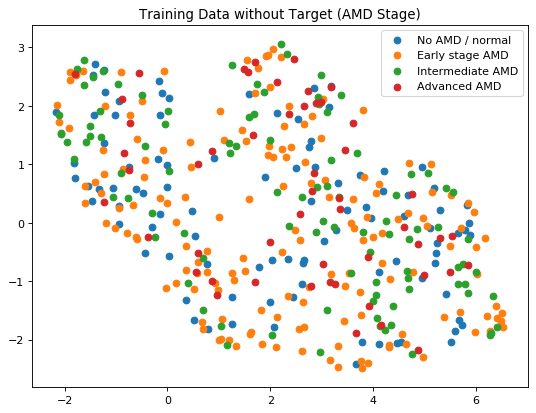

In [6]:
# Dimentional reduction with no target
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.set_title("Training Data without Target (AMD Stage)")
ax.legend()
plt.show()

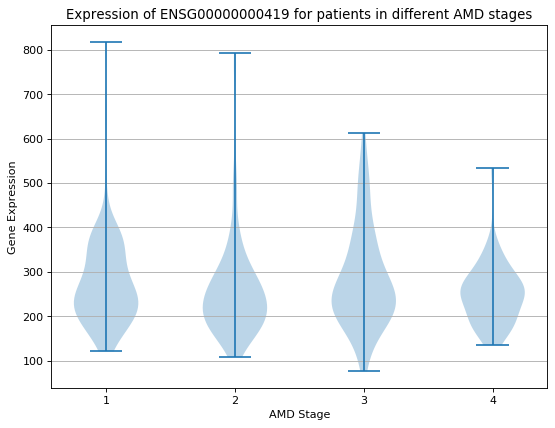

In [7]:
# Violin plot based on a specific gene
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.violinplot(dataset = [train_stage1[gene_id].values,
                         train_stage2[gene_id].values,
                         train_stage3[gene_id].values,
                         train_stage4[gene_id].values])
ax.set_title('Expression of ' + gene_id + " for patients in different AMD stages")
ax.yaxis.grid(True)
ax.set_xlabel('AMD Stage')
ax.set_ylabel('Gene Expression')
ax.set_xticklabels(['', '1', '2', '3', '4'])
plt.locator_params(axis = 'x', nbins = 4)
plt.show()

## Age Group

In [20]:
df_1 = df[df.age < 70].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_2 = df[df.age >= 70][df.age < 80].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_3 = df[df.age >= 80][df.age < 90].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_4 = df[df.age >= 90].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_1, df_2, df_3, df_4])

label_1 = np.zeros(len(df_1))
label_2 = np.ones(len(df_2))
label_3 = np.full(len(df_3), 2)
label_4 = np.full(len(df_4), 3)
y = np.concatenate([label_1, label_2, label_3, label_4])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


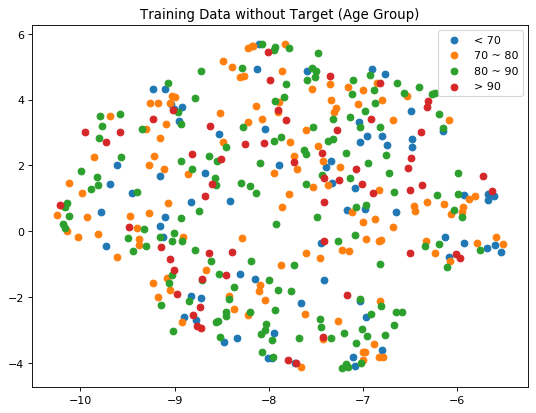

In [21]:
# Dimentional reduction with no target
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = '< 70')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = '70 ~ 80')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = '80 ~ 90')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = '> 90')
ax.set_title("Training Data without Target (Age Group)")
ax.legend()
plt.show()

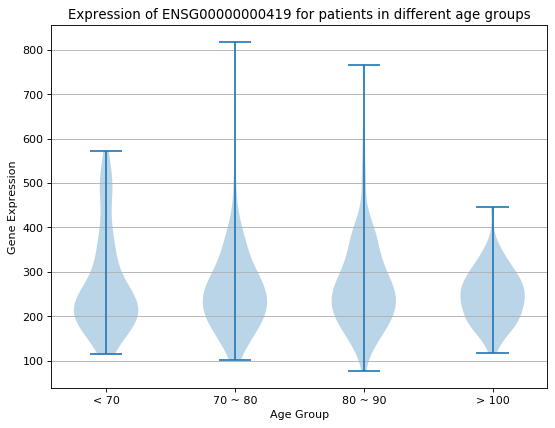

In [22]:
# Violin plot based on a specific gene
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.violinplot(dataset = [df_1[gene_id].values,
                         df_2[gene_id].values,
                         df_3[gene_id].values,
                         df_4[gene_id].values])
ax.set_title('Expression of ' + gene_id + " for patients in different age groups")
ax.yaxis.grid(True)
ax.set_xlabel('Age Group')
ax.set_ylabel('Gene Expression')
ax.set_xticklabels(['', '< 70', '70 ~ 80', '80 ~ 90', '> 100'])
plt.locator_params(axis = 'x', nbins = 4)
plt.show()

## RNA Isolation Batch

In [11]:
# Divide data in training set into 2 groups according to RNA isolation batch
df_1 = df[df.rna_isolation_batch.str.contains('1')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_2 = df[df.rna_isolation_batch.str.contains('2')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_1, df_2])

label_1 = np.zeros(len(df_1))
label_2 = np.ones(len(df_2))
y = np.concatenate([label_1, label_2])

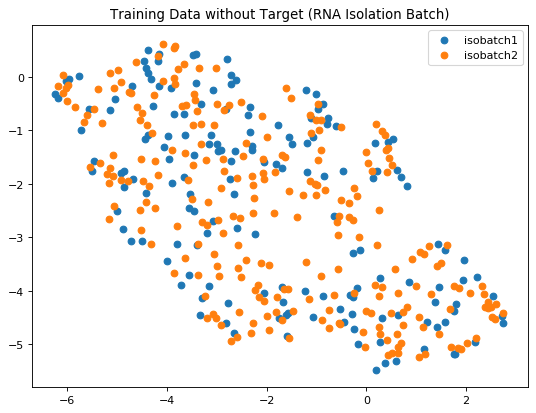

In [12]:
# Dimentional reduction with no target
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'isobatch1')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'isobatch2')
ax.set_title("Training Data without Target (RNA Isolation Batch)")
ax.legend()
plt.show()

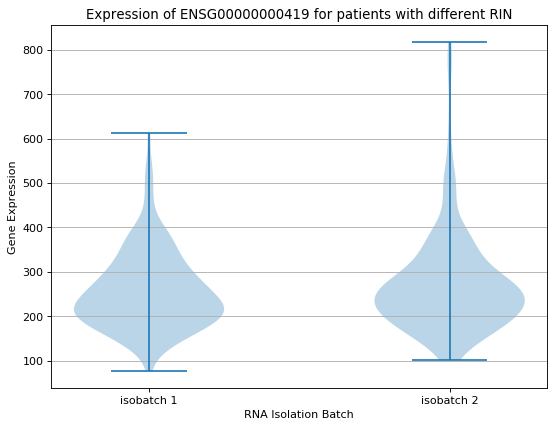

In [13]:
# Violin plot based on a specific gene
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.violinplot(dataset = [df_1[gene_id].values,
                         df_2[gene_id].values])
ax.set_title('Expression of ' + gene_id + " for patients with different RIN")
ax.yaxis.grid(True)
ax.set_xlabel('RNA Isolation Batch')
ax.set_ylabel('Gene Expression')
ax.set_xticklabels(['', 'isobatch 1', 'isobatch 2'])
plt.locator_params(axis = 'x', nbins = 2)
plt.show()

## Library Prepper

In [14]:
# Divide data in training set into 2 groups according to library prepper
df_MRS = df[df.library_prepper.str.contains('MRS')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_RRP = df[df.library_prepper.str.contains('RRP')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_MRS, df_RRP])

label_MRS = np.zeros(len(df_MRS))
label_RRP = np.ones(len(df_RRP))
y = np.concatenate([label_MRS, label_RRP])

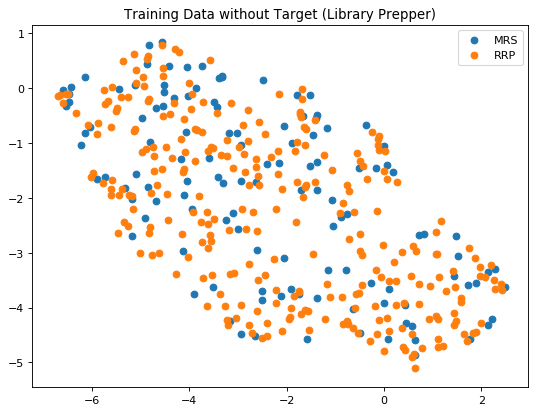

In [15]:
# Dimentional reduction with no target
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'MRS')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'RRP')
ax.set_title("Training Data without Target (Library Prepper)")
ax.legend()
plt.show()

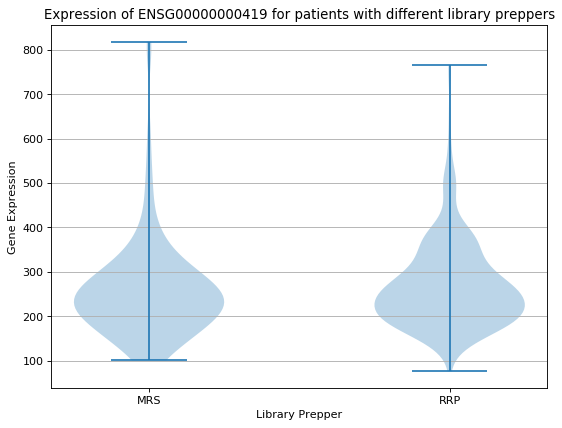

In [16]:
# Violin plot based on a specific gene
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.violinplot(dataset = [df_MRS[gene_id].values,
                         df_RRP[gene_id].values])
ax.set_title('Expression of ' + gene_id + " for patients with different library preppers")
ax.yaxis.grid(True)
ax.set_xlabel('Library Prepper')
ax.set_ylabel('Gene Expression')
ax.set_xticklabels(['', 'MRS', 'RRP'])
plt.locator_params(axis = 'x', nbins = 2)
plt.show()

## Gender

In [17]:
# Divide data in training set into 2 groups according to gender
df_F = df[df.sex.str.contains('F')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
df_M = df[df.sex.str.contains('M')].drop(['rna_isolation_batch', 'library_prepper', 'sex', 'age'], axis = 1)
X = np.vstack([df_F, df_M])

label_F = np.zeros(len(df_F))
label_M = np.ones(len(df_M))
y = np.concatenate([label_F, label_M])

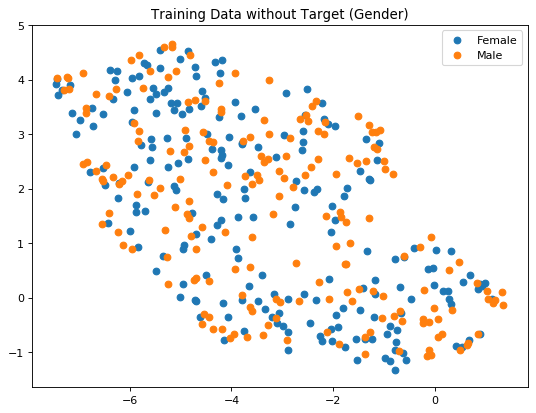

In [18]:
# Dimentional reduction with no target
X_embedded = umap.UMAP(
    n_components = params[0],
    n_neighbors = params[1],
    min_dist = params[2],
    metric = params[3]
).fit_transform(X)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'Female')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Male')
ax.set_title("Training Data without Target (Gender)")
ax.legend()
plt.show()

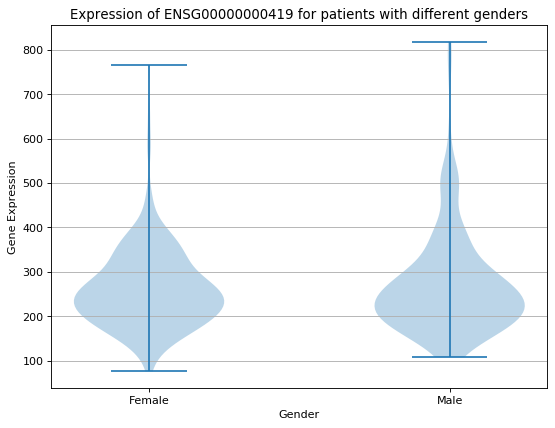

In [19]:
# Violin plot based on a specific gene
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.violinplot(dataset = [df_F[gene_id].values,
                         df_M[gene_id].values])
ax.set_title('Expression of ' + gene_id + " for patients with different genders")
ax.yaxis.grid(True)
ax.set_xlabel('Gender')
ax.set_ylabel('Gene Expression')
ax.set_xticklabels(['', 'Female', 'Male'])
plt.locator_params(axis = 'x', nbins = 2)
plt.show()